## 1. Import Libraries

In [1]:
import sys
parentdir = ".."
sys.path.insert(0, parentdir)

import requests
import os
import datetime
#from os import path
from tqdm.notebook import tqdm
import pandas as pd
import time

from metrics.WebResource import WebResource
from rdflib import Graph
from xml.dom import minidom
from rdflib import ConjunctiveGraph, Namespace, URIRef
from rdflib.namespace import RDF, RDFS

import random
import matplotlib.pyplot as plt

from SPARQLWrapper import SPARQLWrapper, JSON

from rdflib import Graph, URIRef
from rdflib.namespace import RDFS, SKOS

/Users/frikha-s/opt/anaconda3/envs/fair-checker-env/lib/python3.8/site-packages/rdflib_jsonld/__init__.py:9: DeprecationWarning: The rdflib-jsonld package has been integrated into rdflib as of rdflib==6.0.1.  Please remove rdflib-jsonld from your project's dependencies.
  warnings.warn(
[WDM] - 

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 105.0.5195
[WDM] - Get LATEST driver version for 105.0.5195
[WDM] - Get LATEST driver version for 105.0.5195
[WDM] - Trying to download new driver from https://chromedriver.storage.googleapis.com/105.0.5195.52/chromedriver_mac64.zip
[WDM] - Driver has been saved in cache [/Users/frikha-s/.wdm/drivers/chromedriver/mac64/105.0.5195.52]


## 2. Retrieve a List of Target URLs

In [2]:
# parse the xml file
mydoc = minidom.parse('Sitemap.xml')
urls = mydoc.getElementsByTagName('ExpertLink')

with open('URLs.txt', 'w') as f:
    for u in urls:
        f.write(u.firstChild.data)
        f.writelines('\n')

In [3]:
mydoc = open('URLs.txt', 'r')
urls = mydoc.readlines()

## 3. Feed the RDF Graph

In [4]:
schema = Namespace("http://schema.org/")

In [7]:
## ratelimit decorator
from ratelimit import limits, RateLimitException, sleep_and_retry

# five_by_seconds = 0.8
dix_par_minute = 6

@sleep_and_retry
@limits(calls=1, period=dix_par_minute)
def ask_orphanet(u):
    wr = WebResource(url=u)
    return wr.get_rdf()

In [8]:
KG_Total = ConjunctiveGraph()
urls_not_scrapped=urls

In [9]:
%%time

for u in tqdm(urls):
    KG_Total += ask_orphanet(u)
    urls_not_scrapped.remove(u)

  0%|          | 0/10617 [00:00<?, ?it/s]

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
Timeout, retrying
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
HTTPConnectionPool(host='www.orpha.net', port=80): Max retries exceeded with url: /consor/cgi-bin/OC_Exp.php?lng=en&Expert=399103%0A (Caused by NewConnectionError('<urllib3.connection.HTTPConnection obje

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schema.org/
http://schem

In [11]:
print(len(urls), "==> urls not scrapped, ", len(urls_not_scrapped))
print(f"Loaded {len(KG_Total)} triples")

5308 ==> urls not scrapped,  5308
Loaded 125404 triples


In [12]:
##Display the total triples contained in the graph, after scrapping all URLs in the XML file
print(f"Loaded {len(KG_Total)} triples")

Loaded 125404 triples


In [13]:
#Save the KG in a turtle file
KG_Total.serialize("orphanet_dump.ttl", format="turtle")

<Graph identifier=Nbbbae4399db8457fb8dd773c46e7b9ec (<class 'rdflib.graph.ConjunctiveGraph'>)>

In [ ]:
!cat orphanet_dump.ttl

In [14]:
#Display the file's size
#!cat scrapped_orphanet_bioschemas.ttl
from pathlib import Path
file_size =Path(r'orphanet_dump.ttl').stat().st_size
print("The file size is:", file_size,"bytes")

The file size is: 5488367 bytes


## 5. Display Bioschemas Properties Counts

In [15]:
def get_dataframe_from_query_results(res):    
    return pd.DataFrame(res.bindings)

In [16]:
### display used properties
property_counts = """
SELECT ?p (count(?p) as ?count) WHERE {
    ?s ?p ?o .
} 
GROUP BY ?p
ORDER BY DESC(?count)
"""

res = KG_Total.query(property_counts)
print(res)
print("********** Used properties **********")
df = get_dataframe_from_query_results(res)
df

********** Used properties **********


,count,p
0,29675,http://www.w3.org/1999/02/22-rdf-syntax-ns#type
1,19249,http://schema.org/codeValue
2,19249,http://schema.org/code
3,19249,http://schema.org/codingSystem
4,6704,http://schema.org/alternateName
5,5213,http://schema.org/description
6,5213,http://schema.org/inLanguage
7,5213,http://schema.org/name
8,5213,http://schema.org/textValue
9,5213,http://schema.org/identifier


## 6. Display Bioschemas Classes Counts

In [17]:
### display used classes
classes_counts = """
SELECT ?c (count(?c) as ?count) WHERE {
    ?s rdf:type ?c .
} 
GROUP BY ?c
ORDER BY DESC(?count)
"""

res = KG_Total.query(classes_counts)
print()
print("********** Used classes **********")
df = get_dataframe_from_query_results(res)
df


********** Used classes **********


,c,count
0,http://schema.org/MedicalCode,19249
1,http://schema.org/PronounceableText,5213
2,http://schema.org/MedicalCondition,5213


In [18]:
df = pd.DataFrame(res ,columns=['class','count'])

df["class"] = df["class"].astype("str")
df["count"] = df["count"].astype("int")
df.dtypes

class    object
count     int64
dtype: object

In [19]:
count_sum=94

def pourcentage(x):
          return x*100/count_sum
def get_suffix(x):
      return str(x).split(sep="/")[-1]

df2 = df.copy()
df2["%"] = df2['count'].apply(pourcentage)
df2["label"] = df2['class'].apply(get_suffix)
df2

,class,count,%,label
0,http://schema.org/MedicalCode,19249,20477.659574,MedicalCode
1,http://schema.org/PronounceableText,5213,5545.744681,PronounceableText
2,http://schema.org/MedicalCondition,5213,5545.744681,MedicalCondition


In [20]:
#Ordering for better visualisation
cols = df2.columns.tolist()
#cols = [cols[0], cols[3], cols[1], cols[2]]
cols = [cols[3], cols[1]]
df2 = df2[cols]
df2

,label,count
0,MedicalCode,19249
1,PronounceableText,5213
2,MedicalCondition,5213


********** ********** Scatter Chart ********** **********


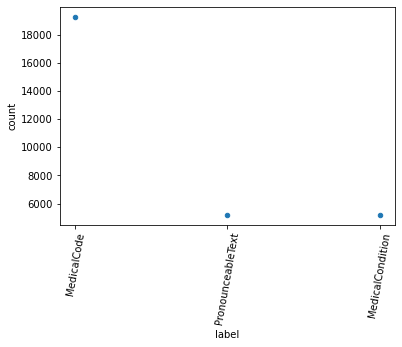

********** ********** Bar Chart ********** **********


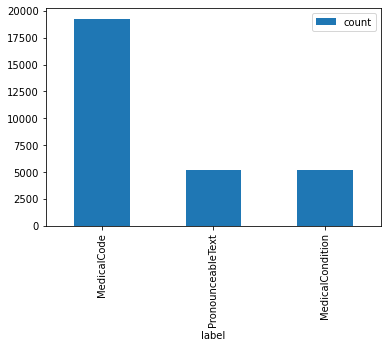

********** ********** Pie Chart ********** **********


<AxesSubplot:title={'center':'Pie Chart'}, ylabel='count'>

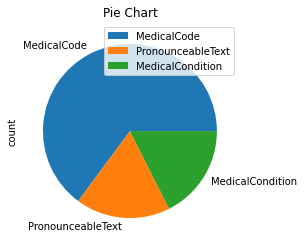

In [21]:
print("********** ********** Scatter Chart ********** **********")
df2.plot(x ='label', y='count', kind = 'scatter', rot=80)
plt.show()

print("********** ********** Bar Chart ********** **********")
df2.plot(x ='label', y='count', kind = 'bar')
plt.show()

print("********** ********** Pie Chart ********** **********")

my_labels=['MedicalCode','PronounceableText','MedicalCondition']
df2.plot.pie(title="Pie Chart",y='count',figsize=(4,4),labels=my_labels)

# Histogram Bar 

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# create the uneven arrays
mu, sigma = 200, 25
np.random.seed(365)

x1 = mu + sigma*np.random.randn(990, 1)
x2 = mu + sigma*np.random.randn(980, 1)
x3 = mu + sigma*np.random.randn(1000, 1)

# create the dataframe; enumerate is used to make column names
df = pd.concat([pd.DataFrame(a, columns=[f'x{i}']) for i, a in enumerate([x1, x2, x3], 1)], axis=1)

# plot the data
df.plot.hist(stacked=True, bins=30, density=True, figsize=(10, 6), grid=True)

In [ ]:
# stacked histogram
import matplotlib.pyplot as plt
f = plt.figure(figsize=(7,5))
ax = f.add_subplot(1,1,1)

# mock your data frame
import pandas as pd
import numpy as np
_df = pd.DataFrame({
    "age":np.random.normal(30,30,1000),
    "survived":np.random.randint(0,2,1000)
})

# plot
import seaborn as sns
sns.histplot(data=_df, ax=ax, stat="count", multiple="stack",
             x="age", kde=False,
             palette="pastel", hue="survived",
             element="bars", legend=True)
ax.set_title("Seaborn Stacked Histogram")
ax.set_xlabel("Age")
ax.set_yl
abel("Count")

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

dummy = {'id': [1,2,3,4,5], 
        'brand': ['MS', 'Apple', 'MS', 'Google', 'Apple'], 
        'quarter': ['2017Q2', '2017Q2', '2017Q2', '2016Q1', '2015Q1']}

dummyData = pd.DataFrame(dummy, columns = ['id', 'brand', 'quarter'])
dummyData

df = dummyData.groupby(['quarter','brand']).size().unstack(fill_value=0)
#alternative solution
#df = pd.crosstab(dummyData['quarter'], dummyData['brand'])
print (df)
df.plot.bar()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

coffee = np.array([5, 5, 7, 6, 7])
tea = np.array([1, 2, 0, 2, 0])
water = np.array([10, 12, 14, 12, 15])
names = ['Mary', 'Paul', 'Billy', 'Franka', 'Stephan']

fig = plt.figure(figsize=(6,5), dpi=200)
left, bottom, width, height = 0.2, 0.1, 0.7, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
 
width = 0.35   
ticks = np.arange(len(names))    
ax.bar(ticks, tea, width, label='Coffee', bottom=water+coffee)
ax.bar(ticks, coffee, width, align="center", label='Tea', 
       bottom=water)
ax.bar(ticks, water, width, align="center", label='Water')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

parties = ('CDU/CSU', 'SPD', 'FDP', 'Grüne', 'Die Linke', 'AfD')

election_results_per_year = {}
with open('../data/german_election_results.txt') as fh:
    fh.readline()
    for line in fh:
        year, *results = line.rsplit()
        election_results_per_year[year] = [float(x) for x in results]


election_results_per_party = list(zip(*election_results_per_year.values()))

fig = plt.figure(figsize=(6,5), dpi=200)
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height]) 
 
years = list(election_results_per_year.keys())
width = 0.9 / len(parties) 
ticks = np.arange(len(years)) 

for index, party in enumerate(parties):
    ax.bar(ticks+index*width, election_results_per_party[index], width, label=party)
    
ax.set_ylabel('Percentages of Votes')
ax.set_title('German Elections')
ax.set_xticks(ticks + 0.45)
ax.set_xticklabels(years)

ax.legend(loc='best')
plt.show()


## For Further Visualizations
Have a look to Seaborn and Bokeh libraries
https://seaborn.pydata.org
https://bokeh.org